# EXPLORACIÓN DEL DATASET
## ANÁLISIS BÁSICO

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../Data/01CrudoNoEditar/01desastres_crudo.csv', delimiter=';', encoding='latin-1')
df.head(3)

C:\Users\blanc\AppData\Local\Temp\ipykernel_14040\2290156345.py:1: DtypeWarning: Columns (18,24,25,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../Data/01CrudoNoEditar/01desastres_crudo.csv', delimiter=';', encoding='latin-1')


,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900-9002-CPV,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"2,849084409",NaN,NaN,NaN,NaN
1,1900-9001-IND,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"2,849084409",NaN,NaN,NaN,NaN
2,1902-0012-GTM,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,...,NaN,NaN,NaN,25000.0,843726.0,"2,963047785",NaN,NaN,NaN,NaN


In [3]:
df.shape

(16636, 50)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16636 entries, 0 to 16635
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Dis No                                     16636 non-null  object 
 1   Year                                       16636 non-null  int64  
 2   Seq                                        16636 non-null  int64  
 3   Glide                                      1736 non-null   object 
 4   Disaster Group                             16636 non-null  object 
 5   Disaster Subgroup                          16636 non-null  object 
 6   Disaster Type                              16636 non-null  object 
 7   Disaster Subtype                           13313 non-null  object 
 8   Disaster Subsubtype                        1117 non-null   object 
 9   Event Name                                 3969 non-null   object 
 10  Country               

In [5]:
df['Location'].reset_index().head(50)

,index,Location
0,0,Countrywide
1,1,Bengal
2,2,"Quezaltenango, San Marcos"
3,3,NaN
4,4,NaN
5,5,"Frank, Alberta"
6,6,NaN
7,7,Chittagong
8,8,"Spence's Bridge, British Columbia"
9,9,Kangra


In [6]:
df.isnull().sum()

Dis No                                           0
Year                                             0
Seq                                              0
Glide                                        14900
Disaster Group                                   0
Disaster Subgroup                                0
Disaster Type                                    0
Disaster Subtype                              3323
Disaster Subsubtype                          15519
Event Name                                   12667
Country                                          0
ISO                                              0
Region                                           0
Continent                                        0
Location                                      1811
Origin                                       12551
Associated Dis                               13043
Associated Dis2                              15873
OFDA Response                                14920
Appeal                         

## DATA PROFILING

In [7]:

# from ydata_profiling import ProfileReport

# df = pd.read_csv('../../Data/01CrudoNoEditar/01desastres_crudo.csv', delimiter=';', encoding='latin-1')
# profile = ProfileReport(df, title='Pandas Profiling Report')
# profile

# ANÁLISIS UNIVARIANTE

## ¿CON QUÉ FRECUENCIA OCURREN LOS DISTINTOS SUBGRUPOS DE DESASTRES?

In [8]:
disaster_subgroup = df['Disaster Subgroup'].unique()
print('Subgrupos de desastres naturales reportados:\n', disaster_subgroup)
print('Conteo de subgrupos:\n\n', df['Disaster Subgroup'].value_counts())

Subgrupos de desastres naturales reportados:
 ['Climatological' 'Geophysical' 'Meteorological' 'Hydrological'
 'Biological' 'Extra-terrestrial']
Conteo de subgrupos:

 Hydrological         6612
Meteorological       5235
Geophysical          1912
Biological           1614
Climatological       1262
Extra-terrestrial       1
Name: Disaster Subgroup, dtype: int64


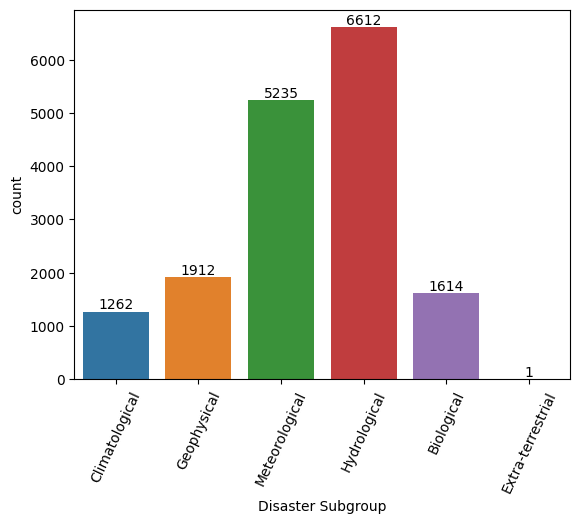

In [9]:
ax = sns.countplot(data = df, x ='Disaster Subgroup')
plt.xticks(rotation=65)
ax.bar_label(ax.containers[0]); 


## ¿CON QUÉ FRECUENCIA OCURREN LOS DISTINTOS TIPOS DE DESASTRES?

In [10]:
disaster_type = df['Disaster Type'].unique()
print('tipos de desastres naturales reportados:\n', disaster_type)
print('Conteo de tipos de desastres:\n\n', df['Disaster Type'].value_counts())

tipos de desastres naturales reportados:
 ['Drought' 'Earthquake' 'Volcanic activity' 'Mass movement (dry)' 'Storm'
 'Flood' 'Epidemic' 'Landslide' 'Wildfire' 'Extreme temperature' 'Fog'
 'Insect infestation' 'Impact' 'Animal accident' 'Glacial lake outburst']
Conteo de tipos de desastres:

 Flood                    5808
Storm                    4618
Earthquake               1597
Epidemic                 1518
Landslide                 804
Drought                   803
Extreme temperature       616
Wildfire                  456
Volcanic activity         270
Insect infestation         95
Mass movement (dry)        45
Glacial lake outburst       3
Fog                         1
Impact                      1
Animal accident             1
Name: Disaster Type, dtype: int64


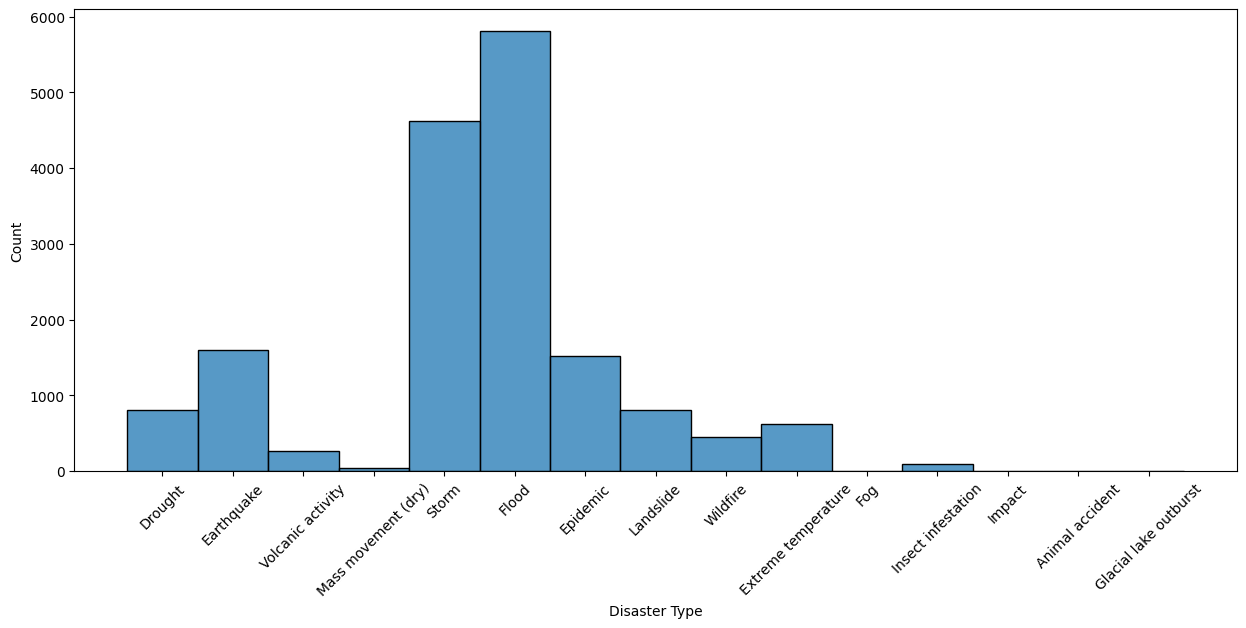

In [11]:
plt.figure(figsize=(15,6))
sns.histplot(df['Disaster Type'])
plt.xticks(rotation=45);

## agrupación disaster type y disaster subgroup

(0.0, 6500.0)

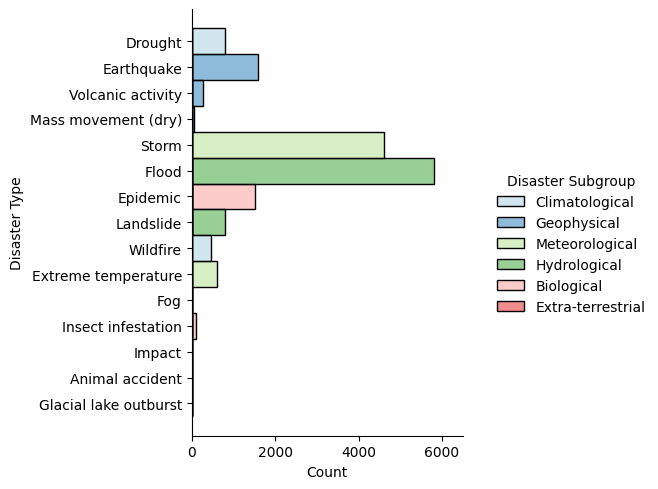

In [12]:
sns.displot (df, y ='Disaster Type', hue= 'Disaster Subgroup',  palette='Paired')
plt.xlim(0, 6500)

## PAÍSES CON MAYOR NÚMERO DE DESASTRES NATURALES

In [13]:
country= df['Country'].unique()

print('Conteo de desastres por paises:\n\n', df['Country'].value_counts())

Conteo de desastres por paises:

 United States of America (the)    1131
China                              994
India                              760
Philippines (the)                  684
Indonesia                          610
                                  ... 
Qatar                                1
Saint BarthÚlemy                     1
Saint Martin (French Part)           1
Sint Maarten (Dutch part)            1
Isle of Man                          1
Name: Country, Length: 228, dtype: int64


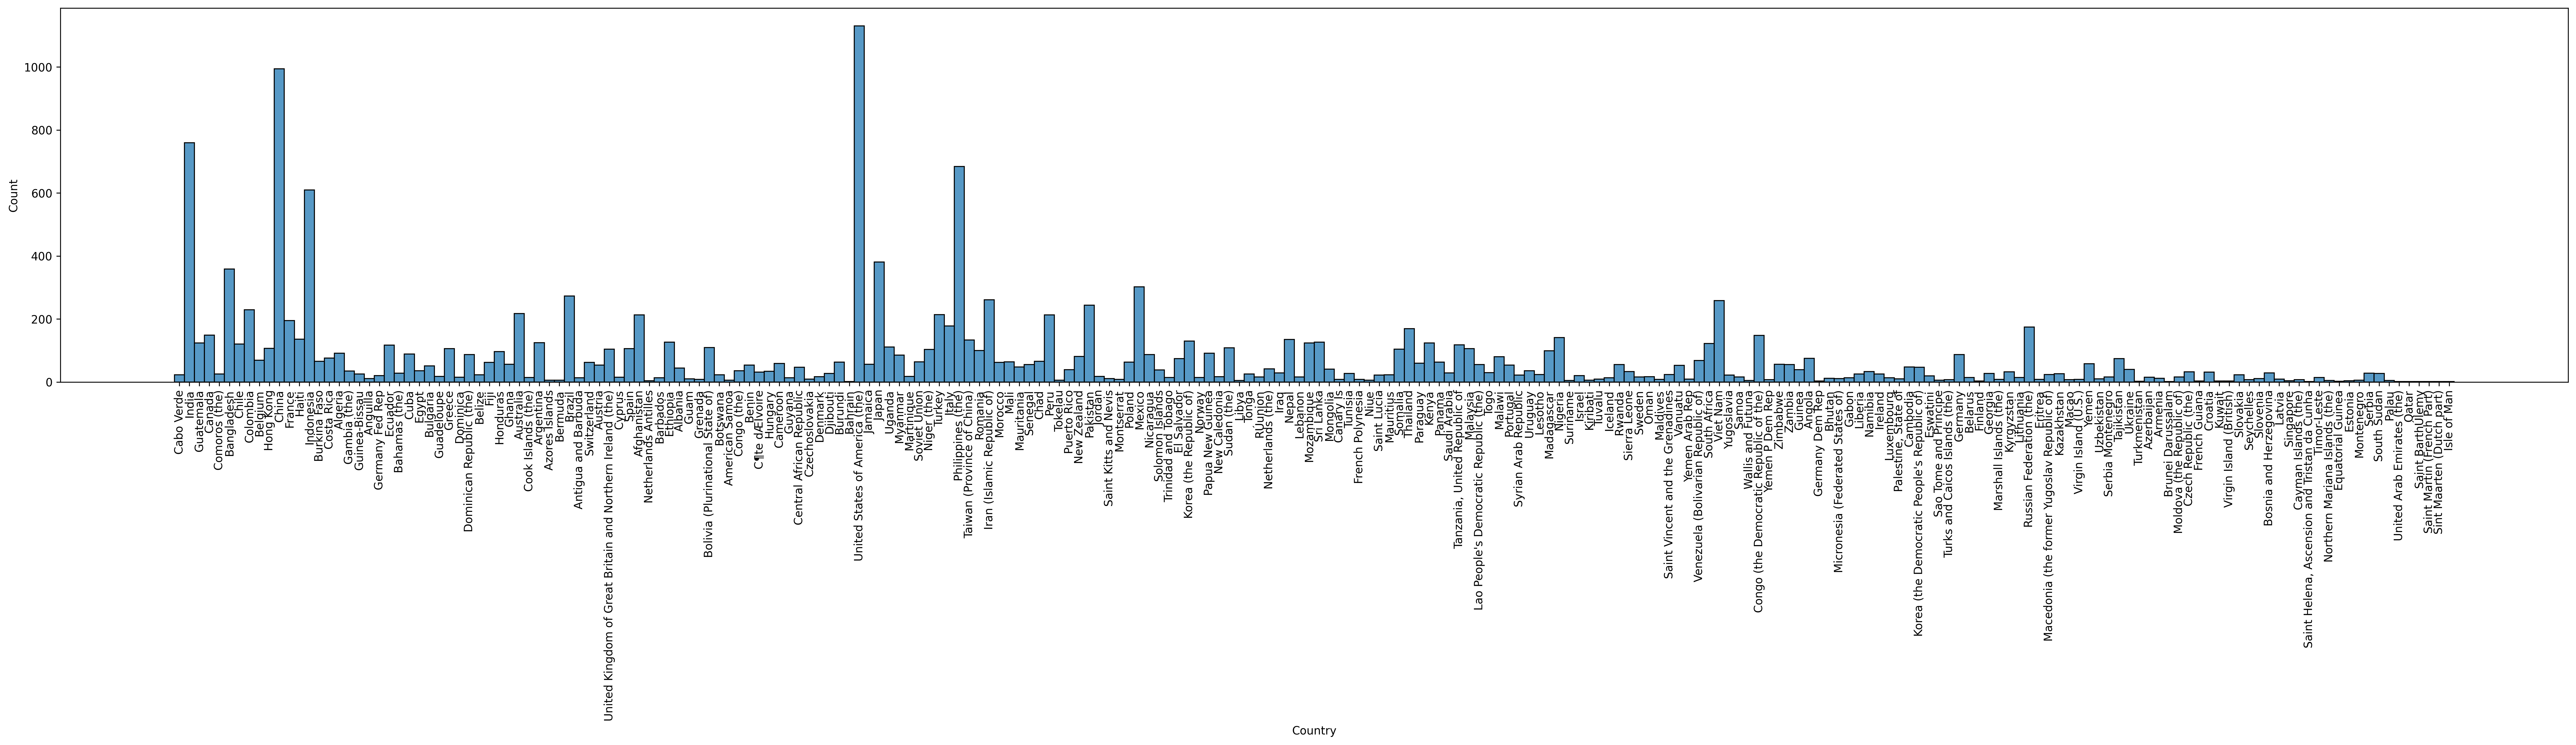

In [14]:
plt.figure(figsize=(40,6), dpi=300)
sns.histplot(df['Country'])
plt.xticks(rotation=90);

## REGIONES CON MAYOR NÚMERO DE DESASTRES NATURALES

In [15]:
region= df['Region'].unique()
print('Regiones afectadas por desastres:', region)

print('Conteo de desastres por regiones:\n\n', df['Region'].value_counts())

Regiones afectadas por desastres: ['Western Africa' 'Southern Asia' 'Central America' 'Northern America'
 'Eastern Africa' 'South America' 'Western Europe' 'Eastern Asia'
 'Caribbean' 'South-Eastern Asia' 'Northern Africa' 'Eastern Europe'
 'Southern Europe' 'Melanesia' 'Australia and New Zealand' 'Polynesia'
 'Northern Europe' 'Western Asia' 'Micronesia' 'Southern Africa'
 'Middle Africa' 'Russian Federation' 'Central Asia']
Conteo de desastres por regiones:

 Southern Asia                2118
South-Eastern Asia           2034
Eastern Asia                 1840
South America                1371
Northern America             1286
Eastern Africa               1221
Central America               845
Western Africa                829
Southern Europe               669
Caribbean                     642
Eastern Europe                556
Western Europe                545
Western Asia                  524
Middle Africa                 452
Northern Africa               356
Australia and New Zealan

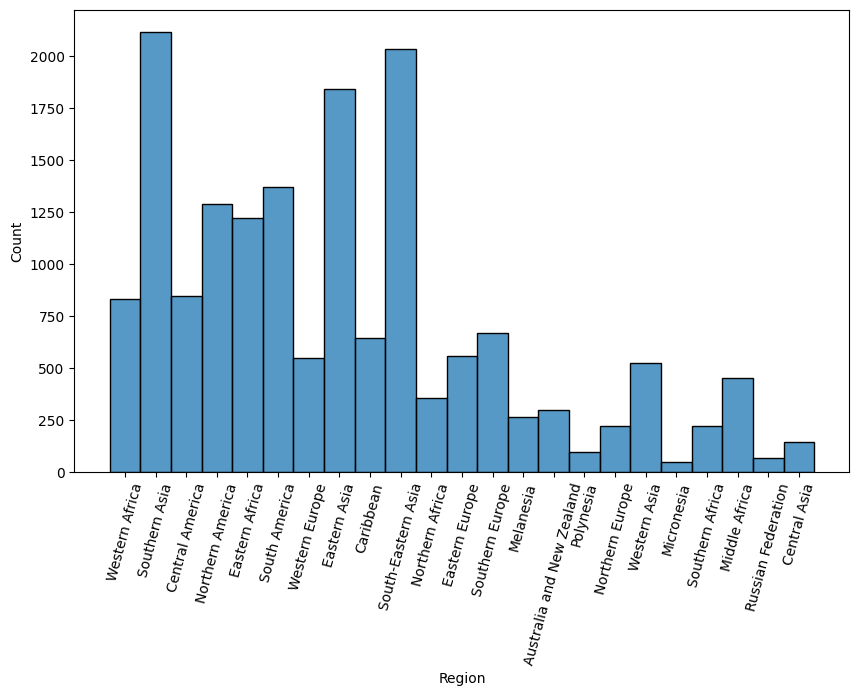

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df['Region'])
plt.xticks(rotation=75);

## CONTINENTES CON MAYOR NÚMERO DE DESASTRES NATURALES

In [17]:
continent= df['Continent'].unique()
print('Continentes afectados por desastres:', continent)

print('Conteo de desastres por paises:\n\n', df['Continent'].value_counts())

Continentes afectados por desastres: ['Africa' 'Asia' 'Americas' 'Europe' 'Oceania']
Conteo de desastres por paises:

 Asia        6660
Americas    4144
Africa      3079
Europe      2054
Oceania      699
Name: Continent, dtype: int64


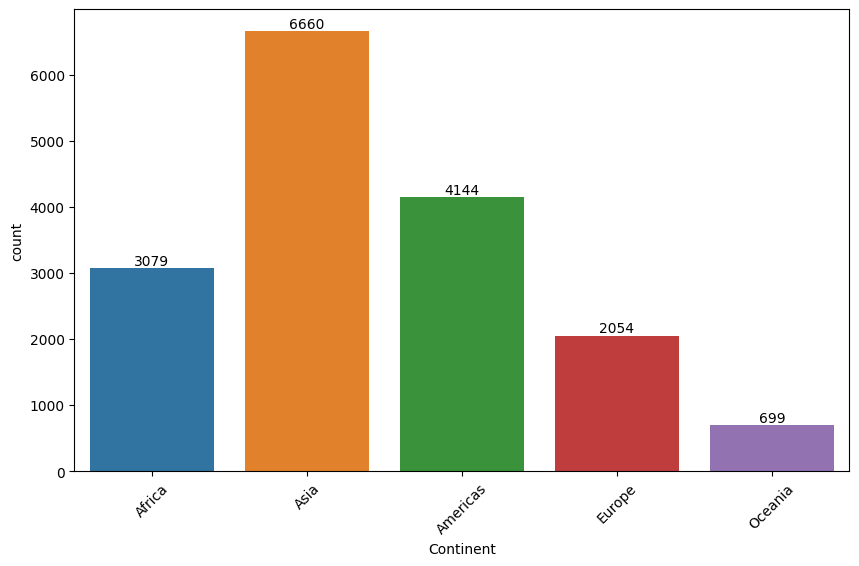

In [18]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x ='Continent')
ax.bar_label(ax.containers[0]); 
plt.xticks(rotation=45);


## Regiones agrupadas en continentes y frecuencia

In [19]:
region_continent = df.groupby('Continent')['Region'].value_counts()

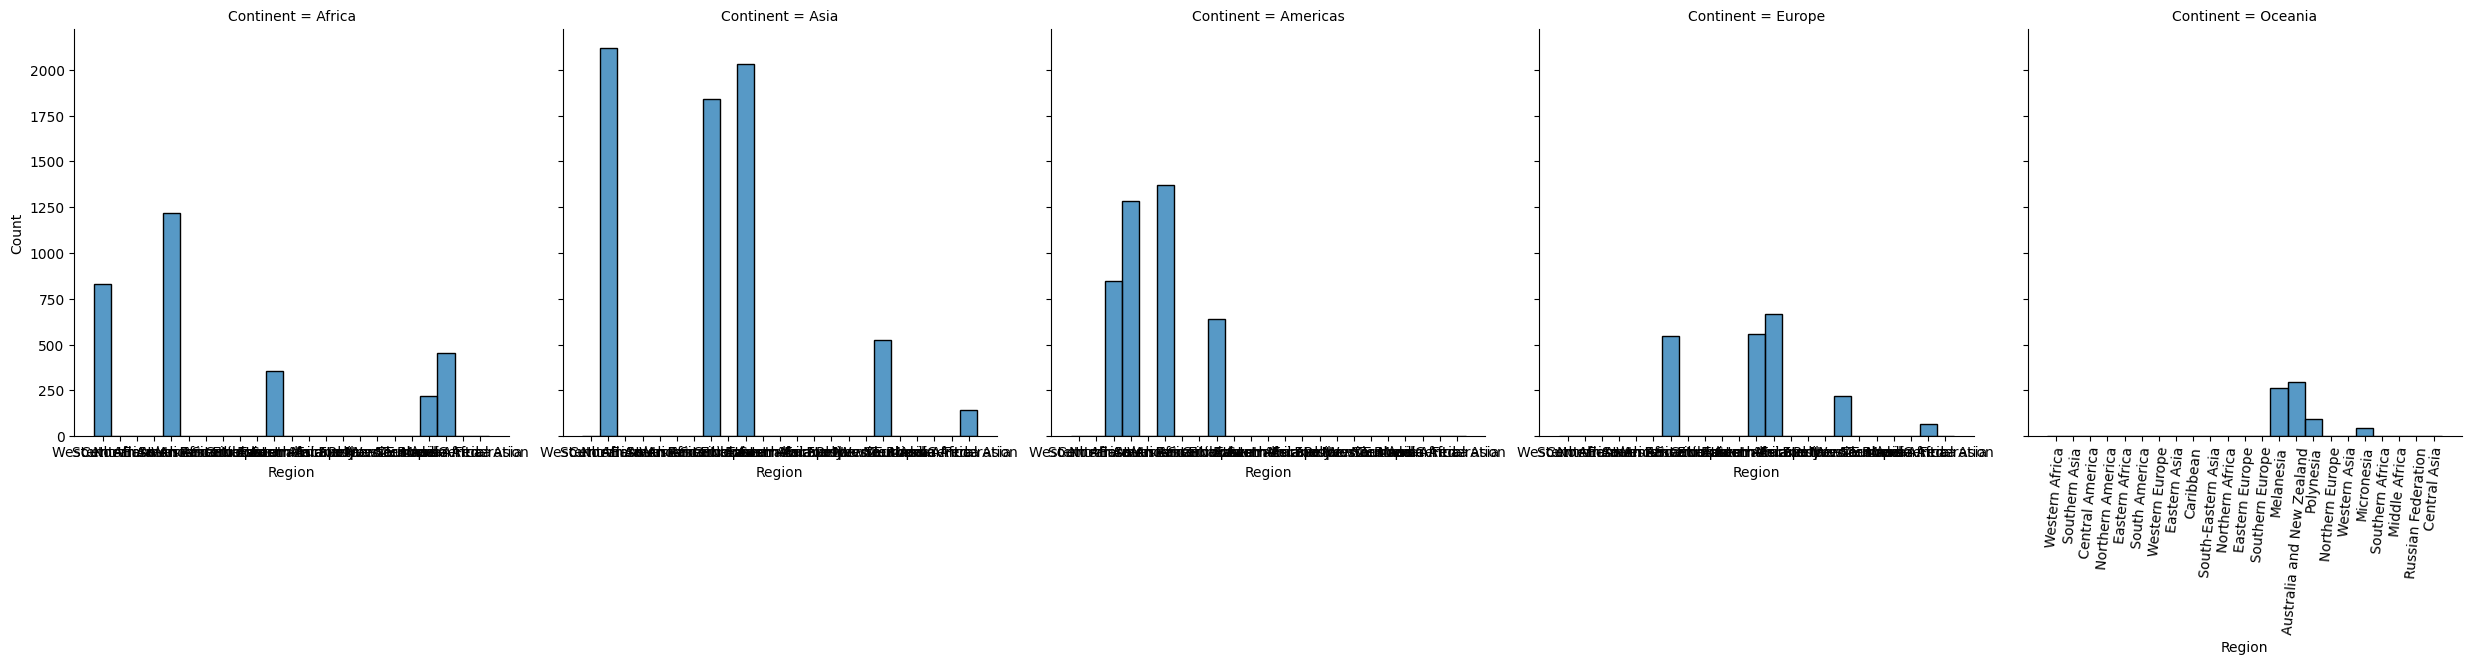

In [20]:
sns.displot (data=df, x = 'Region', col= 'Continent')
plt.xticks(rotation=85)
plt.show()

In [24]:
df_year_continent = df.groupby (['Year', 'Continent'])['Disaster Type'].value_counts()

sns.catplot(df)

Year  Continent  Disaster Type
1900  Africa     Drought          1
      Americas   Epidemic         1
                 Flood            1
                 Storm            1
      Asia       Drought          1
                                 ..
2023  Asia       Wildfire         1
      Europe     Flood            2
      Oceania    Storm            4
                 Earthquake       1
                 Flood            1
Name: Disaster Type, Length: 2369, dtype: int64